## 导入实验所用的包

In [1]:
import warnings
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
%matplotlib inline

warnings.filterwarnings('ignore')

## 数据预处理

In [3]:
df1 = pd.read_csv(r"C:\Users\38061\Jupyter_Notebook\KNN_KMEAN\Apple_stock.csv")
df1.head()
x = df1.iloc[:, 1:4]  # 进行特征和标签的数据切片
y = df1.iloc[:, 4]
# le = preprocessing.LabelEncoder()  # 标准化标签，将标签值统一转换成range范围内
# y2 = le.fit_transform(y)  # 先拟合数据然后将其转化为标准形式
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=521,
                                                    test_size=0.4)


## 建立随机森林模型进行回归预测寻找最优参数

最大准确率为: 0.9998436308952992 此时决策树的数量: 67
最大OOB分数为: 0.9998730442464524 此时决策树的数量: 99


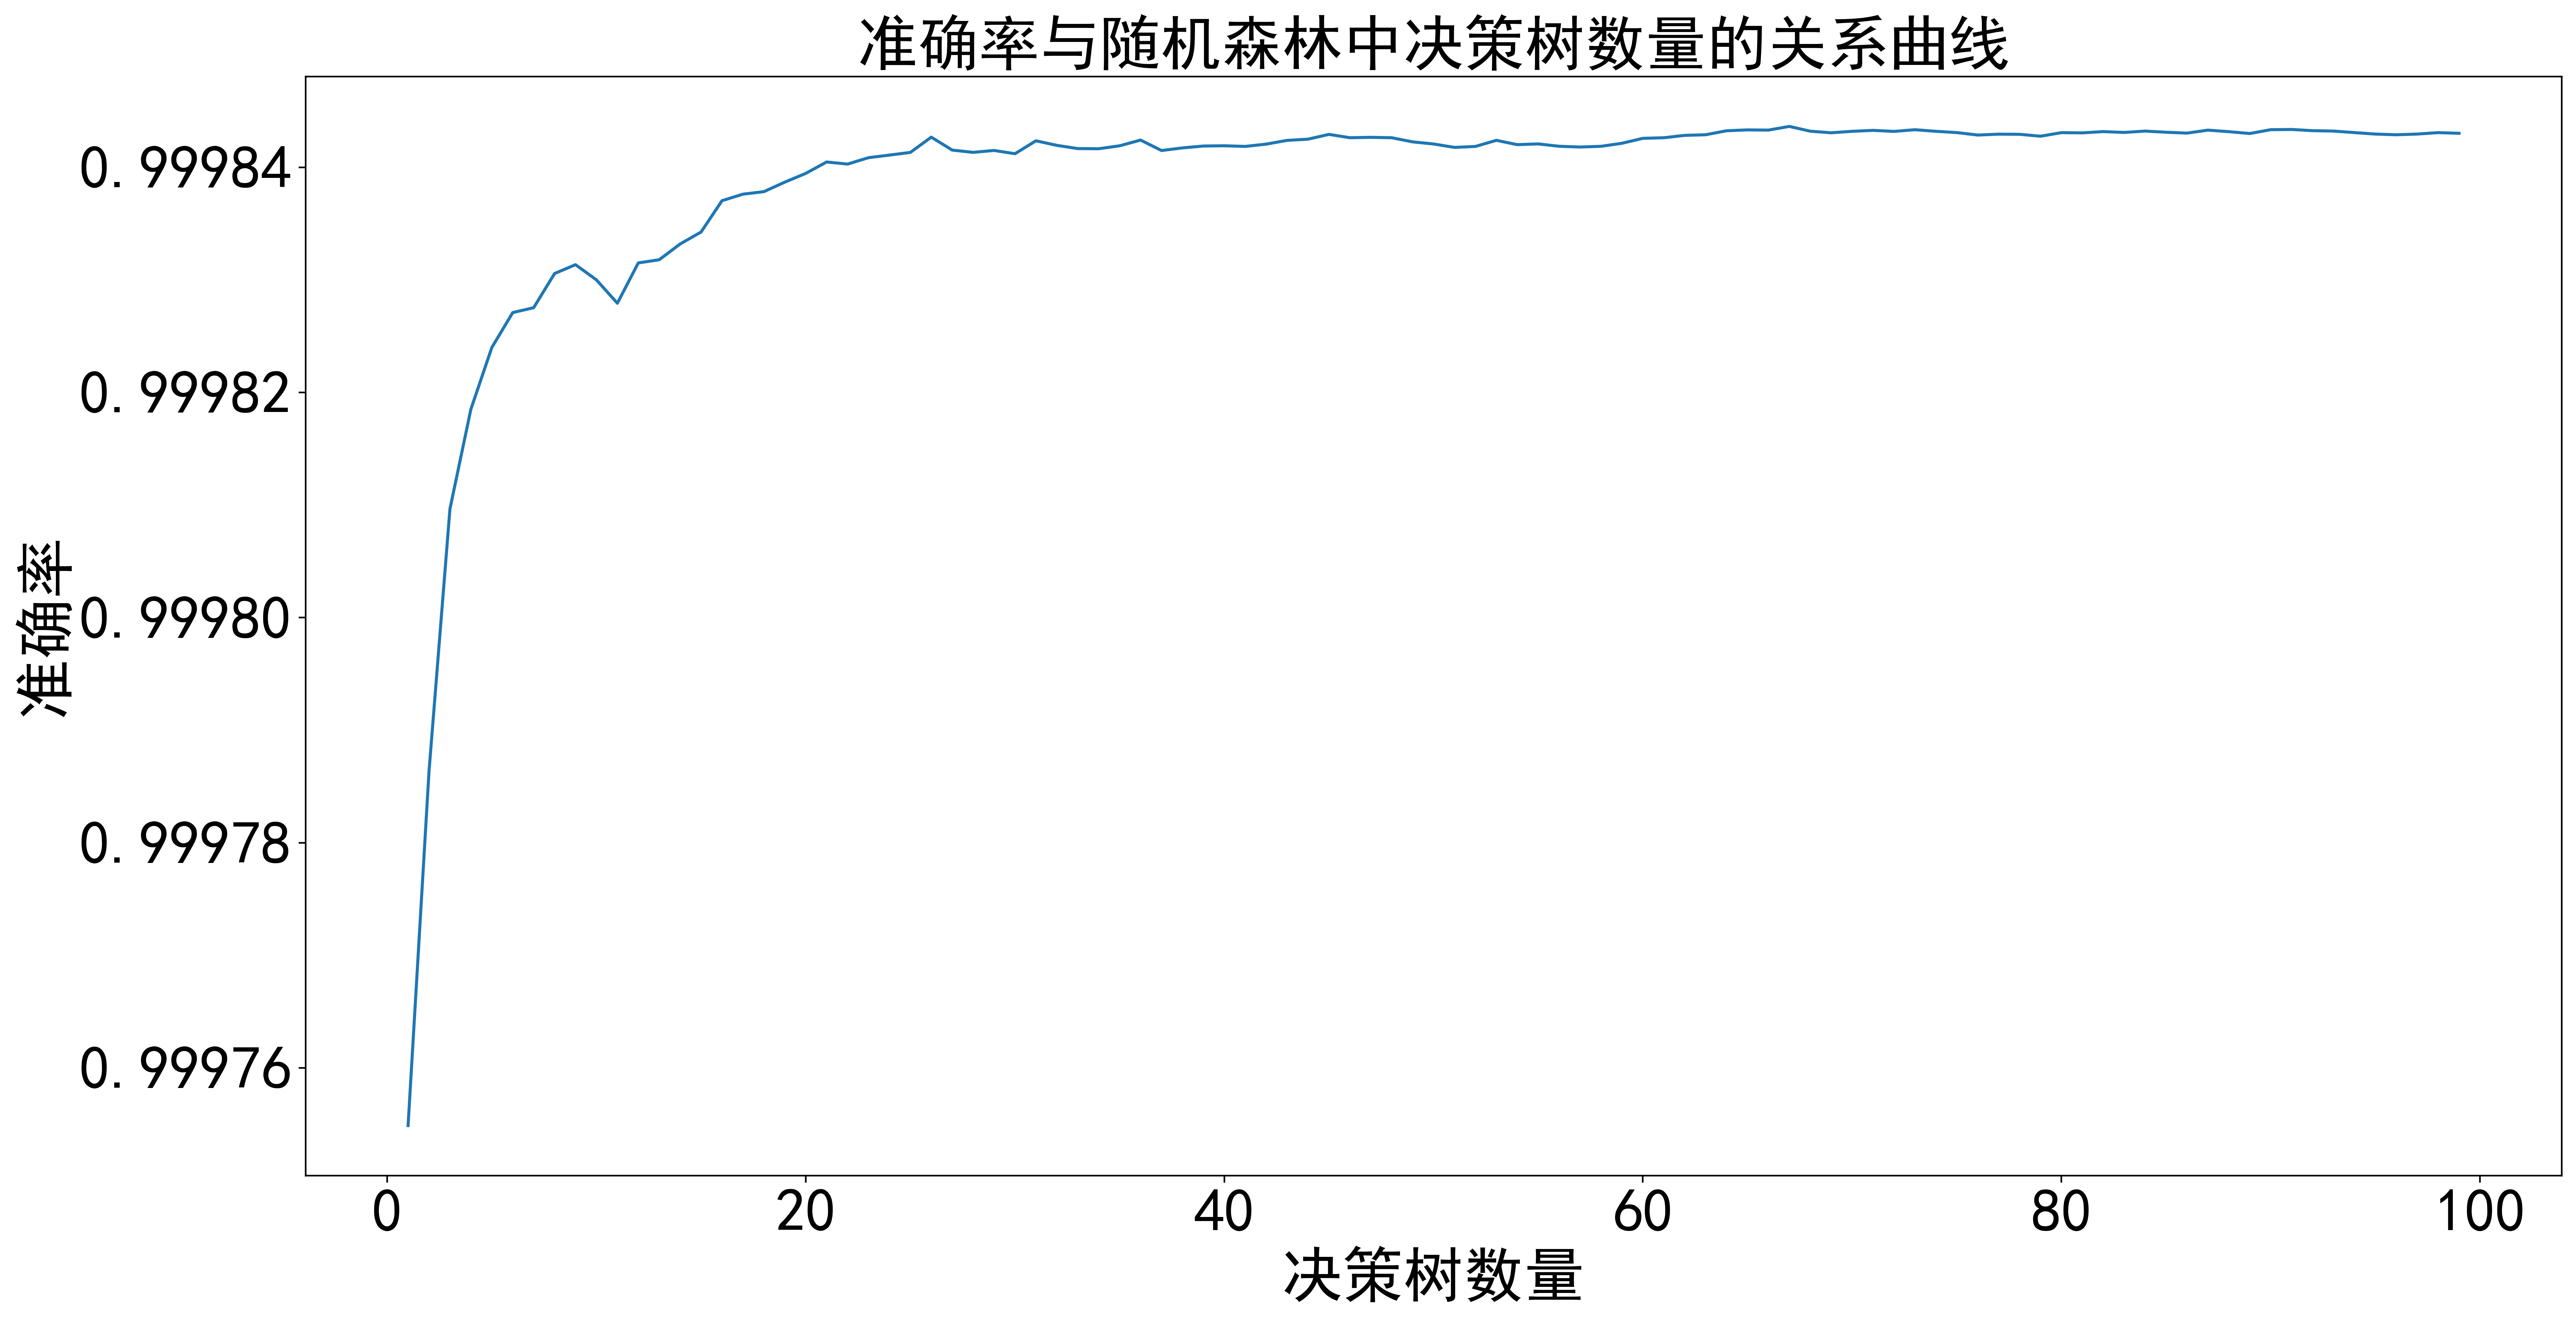

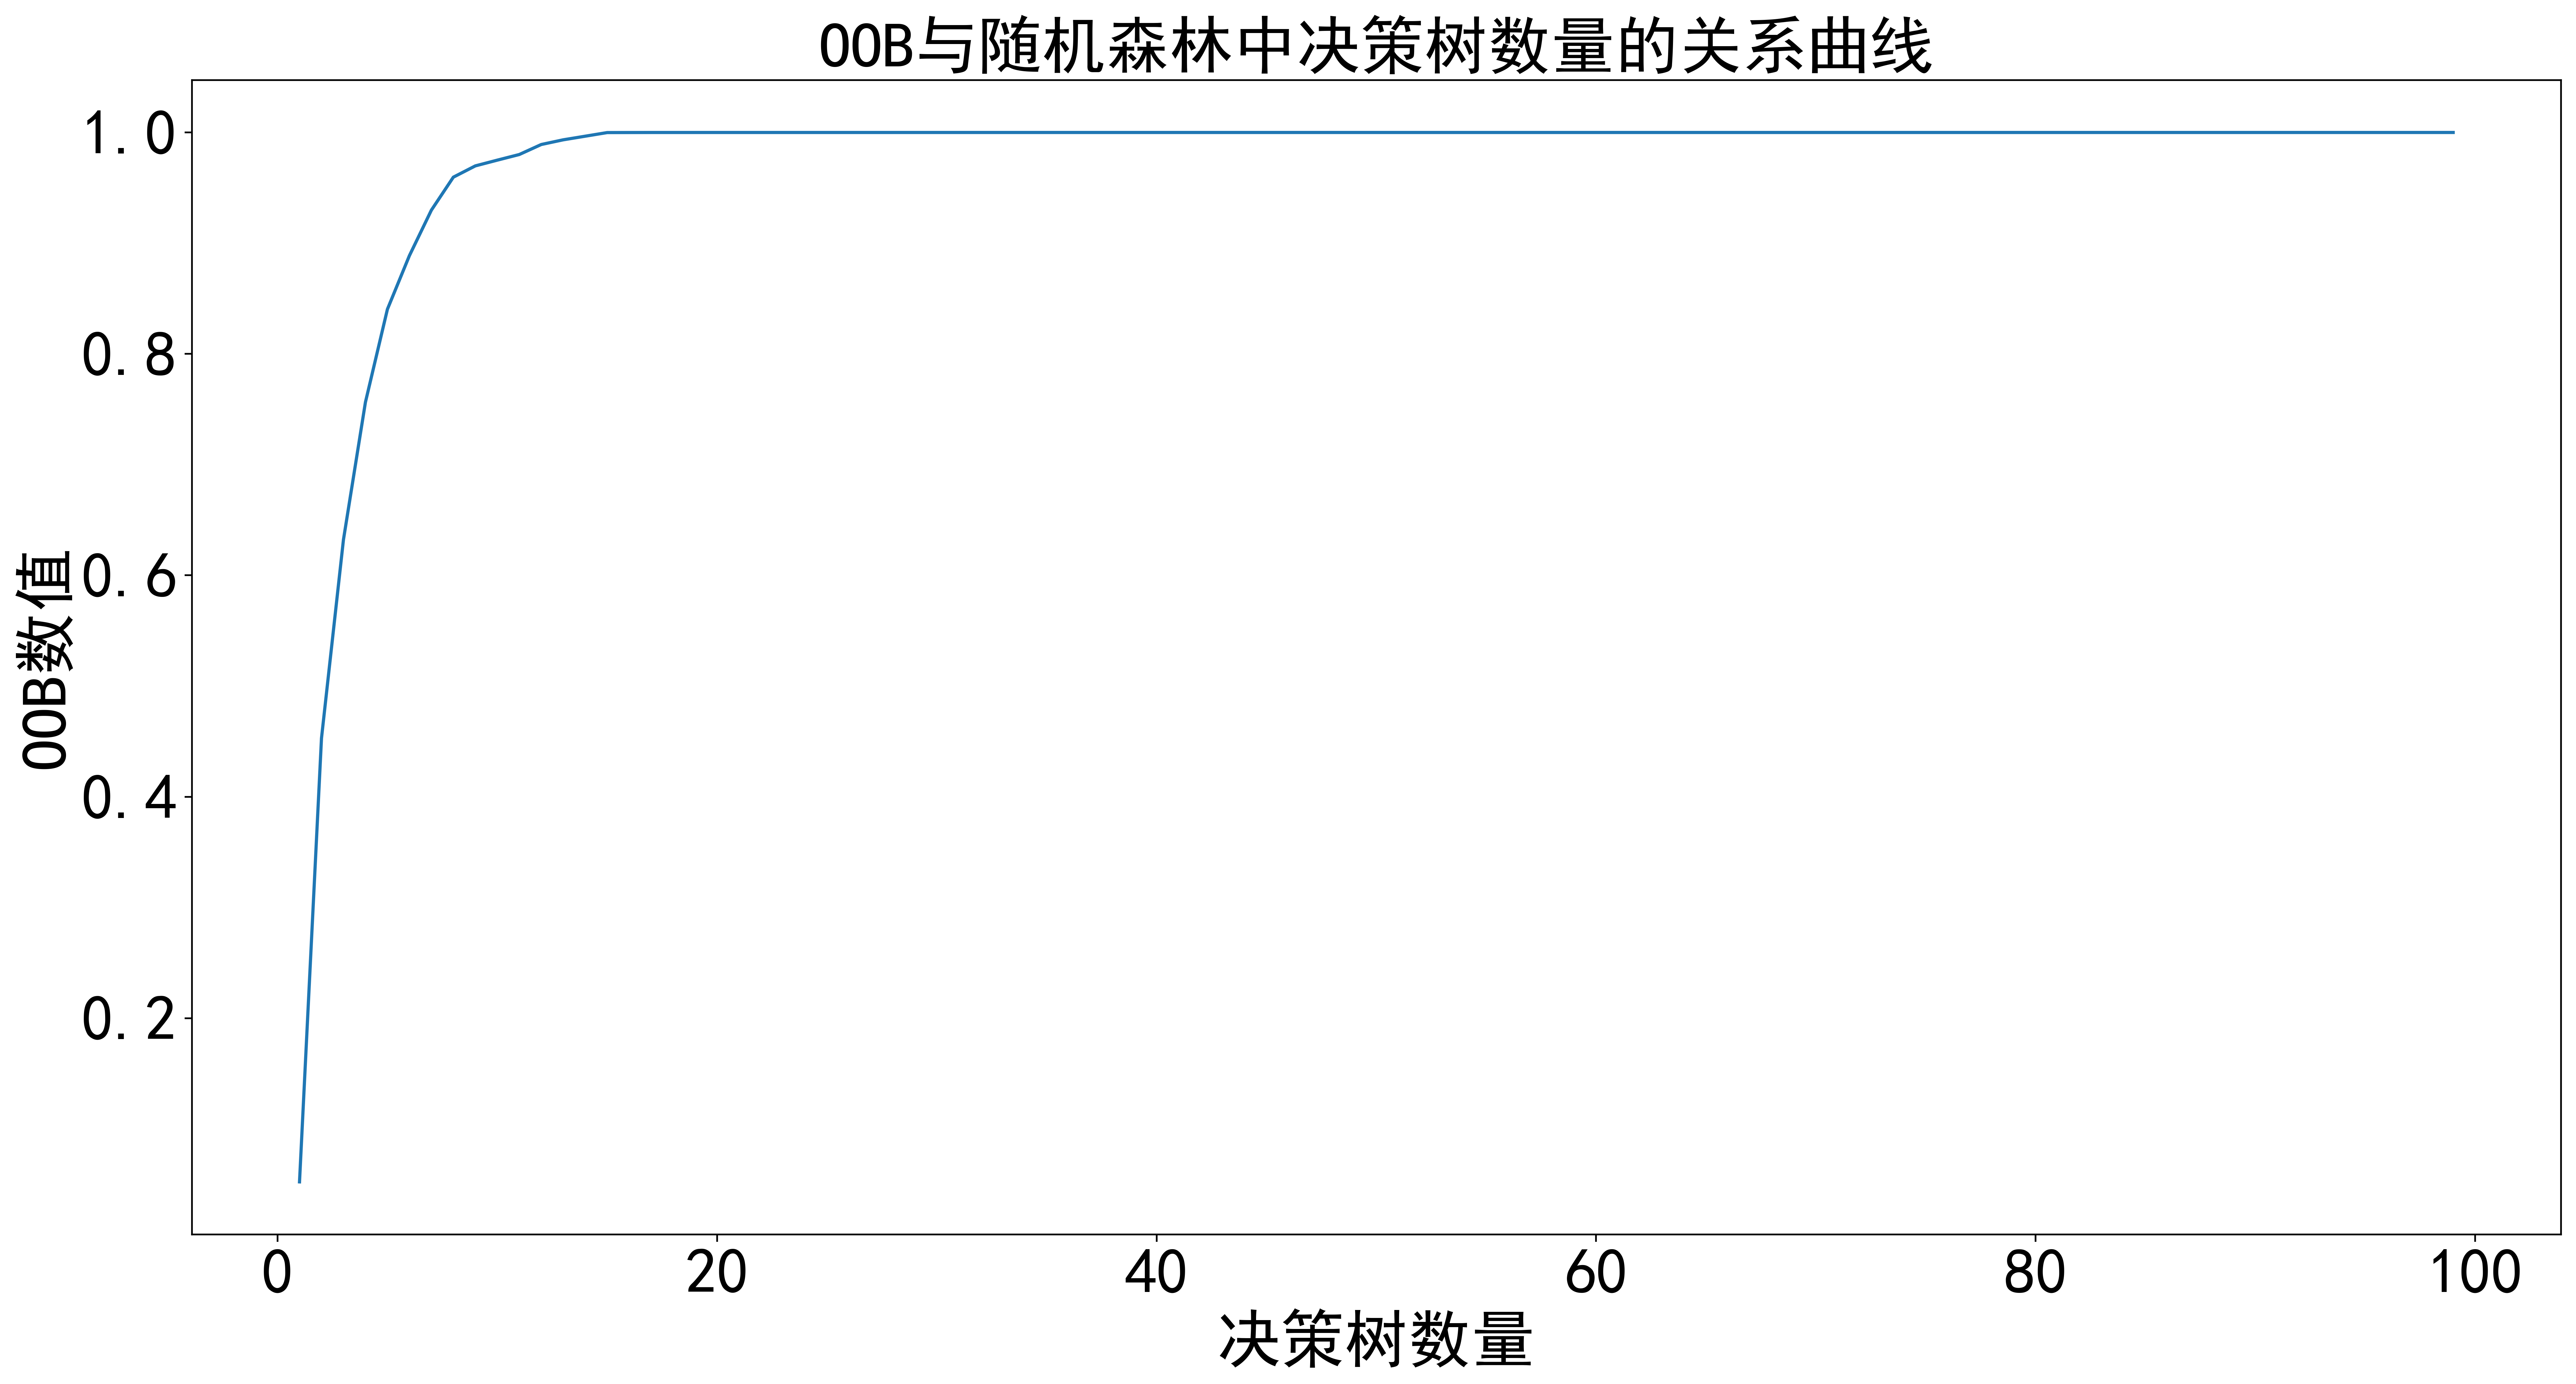

In [4]:
superpa = []
oob = []

for i in range(1, 100):
    rfc = RandomForestRegressor(n_estimators=i,
                                random_state=521,
                                oob_score=True)
    rfc_s = cross_val_score(rfc, x_train, y_train, cv=2).mean()
    superpa.append(rfc_s)
    rfc1 = rfc.fit(x_train, y_train)
    oob.append(rfc1.oob_score_)
    
print('最大准确率为:', max(superpa), '此时决策树的数量:', superpa.index(max(superpa))+1)
print('最大OOB分数为:', max(oob), '此时决策树的数量:', oob.index(max(oob))+1)

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.figure(dpi=500, figsize=[20, 10])
plt.plot(range(1, 100), superpa)
plt.title("准确率与随机森林中决策树数量的关系曲线", fontsize=30)
plt.xlabel("决策树数量", fontsize=30)
plt.ylabel("准确率", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

plt.figure(dpi=500, figsize=[20, 10])
plt.plot(range(1, 100), oob)
plt.title("OOB与随机森林中决策树数量的关系曲线", fontsize=30)
plt.xlabel("决策树数量", fontsize=30)
plt.ylabel("OOB数值", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

## 利用得到的最优参数对测试数据进行拟合

In [5]:
rfc = RandomForestRegressor(n_estimators=67,
                            random_state=521,
                            oob_score=True)

rfc2 = rfc.fit(x_train, y_train)
rfc2.score(x_test, y_test)
print('在测试数据集上准确率为：',rfc2.score(x_test, y_test))

在测试数据集上准确率为： 0.9998747303555292
